In [1]:
#Az önceki örneklerimizde regresyon sorununa değindik ama şimdi hedefimiz farklı excel'den çekeceğimiz zararlı mı değil mi bir internet sitesinde sınıflandırma üzerinde durucaz.


import pandas as pd
import numpy as np

In [2]:
dataFrame= pd.read_excel("maliciousornot.xlsx")

In [3]:
dataFrame

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [4]:
dataFrame.info() #ilk önce data'yı değerlendirme.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [7]:
#bir kolerasyon oluşturmak verimizle bize her zaman daha iyi bir resim verecktir.

dataFrame.corr()["Type"].sort_values() #hangileri type'e göre negatif etkiliyor hangileri pozitif etkiliyor ona bakıyoruz.


URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

In [8]:
import matplotlib.pyplot as plt
import seaborn as sbn


<AxesSubplot:xlabel='Type', ylabel='count'>

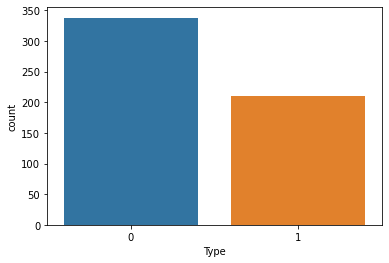

In [10]:
sbn.countplot(x="Type",data=dataFrame) # kaç tane 0 var kaç tane 1 var ona göre..

<AxesSubplot:>

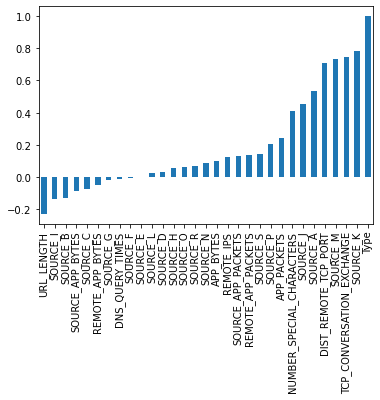

In [13]:
dataFrame.corr()["Type"].sort_values().plot(kind="bar") #kolerasyonumuzu bu şekilde de görebiliriz.

In [14]:
y=dataFrame["Type"].values

x=dataFrame.drop("Type",axis=1).values # şuan x ve y'leri ayırdım ve dizi şekline getirdim yani uygun şekle



In [15]:
from sklearn.model_selection import train_test_split


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.29,random_state=42)

In [17]:
#şimdi de değerleri 0 ile 1 arasında küçültme işlemi olan scaling işlemi

from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler() # bir obje oluşturmam lazım

In [22]:
x_train=scaler.fit_transform(x_train)

In [23]:
x_test=scaler.fit_transform(x_test)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout #Dense diğerleri farklı ama aşağıda öğrenicez.
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
model = Sequential()

In [38]:
model.add(Dense(units=30,activation="relu")) #genellikle şöyle bir jargon var kaç tane features varsa giriş kolonunda o kadar nöron koymanız önerilir.units
model.add(Dense(units=15,activation="relu")) 
model.add(Dense(units=15,activation="relu")) 


#son layerim
model.add(Dense(units=1,activation="sigmoid")) #output layer'imiza akitvasyon olarak sigmoid kullandık ki bu bize 0-1 arasında bir değer veriyordu.

model.compile(loss="binary_crossentropy",optimizer="Adam")#binary gibi bir işlem yapıyoruz yani 0 ile 1 arasında olacak o yüzden burada "mse" kullanamayız.






In [39]:
#sonradan eklendi. EarlyStopping kullanımı

earlyStopping= EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)



In [40]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
13/13 [==============================] - 1s 17ms/step - loss: 0.6914 - val_loss: 0.6877
Epoch 2/700
13/13 [==============================] - 0s 7ms/step - loss: 0.6822 - val_loss: 0.6808
Epoch 3/700
13/13 [==============================] - 0s 7ms/step - loss: 0.6719 - val_loss: 0.6716
Epoch 4/700
13/13 [==============================] - 0s 7ms/step - loss: 0.6582 - val_loss: 0.6584
Epoch 5/700
13/13 [==============================] - 0s 5ms/step - loss: 0.6433 - val_loss: 0.6430
Epoch 6/700
13/13 [==============================] - 0s 5ms/step - loss: 0.6214 - val_loss: 0.6161
Epoch 7/700
13/13 [==============================] - 0s 5ms/step - loss: 0.5948 - val_loss: 0.5834
Epoch 8/700
13/13 [==============================] - 0s 5ms/step - loss: 0.5599 - val_loss: 0.5392
Epoch 9/700
13/13 [==============================] - 0s 5ms/step - loss: 0.5205 - val_loss: 0.4895
Epoch 10/700
13/13 [==============================] - 0s 4ms/step - loss: 0.4728 - val_loss: 0.4319
Epoch 11

In [41]:
kayipVerisi= pd.DataFrame(model.history.history)

In [42]:
kayipVerisi

,loss,val_loss
0,0.691420,0.687704
1,0.682176,0.680768
2,0.671895,0.671574
3,0.658222,0.658401
4,0.643330,0.642988
5,0.621354,0.616128
6,0.594813,0.583372
7,0.559864,0.539241
8,0.520470,0.489480
9,0.472790,0.431861


<AxesSubplot:>

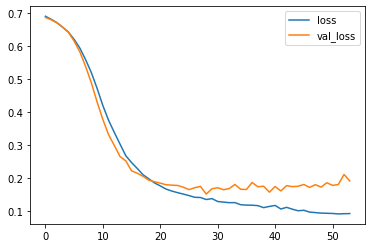

In [43]:
kayipVerisi.plot()

## DROPOUT'UN KULLANIMI


In [57]:
model = Sequential()

model.add(Dense(units=30,activation="relu")) #genellikle şöyle bir jargon var kaç tane features varsa giriş kolonunda o kadar nöron koymanız önerilir.
model.add(Dropout(0.6)) #makbulü 0.5==%50 açıp-kapatma ve aşağısıdır. gereken durumda rastgele kaç tane norön kapatacağıdır.



model.add(Dropout(0.6))

model.add(Dense(units=15,activation="relu")) 

model.add(Dropout(0.6))


#son layerim
model.add(Dense(units=1,activation="sigmoid")) #output layer'imiza akitvasyon olarak sigmoid kullandık ki bu bize 0-1 arasında bir değer veriyordu.

model.compile(loss="binary_crossentropy",optimizer="Adam")#binary gibi bir işlem yapıyoruz yani 0 ile 1 arasında olacak o yüzden burada "mse" kullanamayız.


In [58]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
13/13 [==============================] - 1s 25ms/step - loss: 0.7570 - val_loss: 0.6939
Epoch 2/700
13/13 [==============================] - 0s 5ms/step - loss: 0.6984 - val_loss: 0.6919
Epoch 3/700
13/13 [==============================] - 0s 5ms/step - loss: 0.7199 - val_loss: 0.6895
Epoch 4/700
13/13 [==============================] - 0s 4ms/step - loss: 0.7129 - val_loss: 0.6875
Epoch 5/700
13/13 [==============================] - 0s 4ms/step - loss: 0.6929 - val_loss: 0.6855
Epoch 6/700
13/13 [==============================] - 0s 5ms/step - loss: 0.6685 - val_loss: 0.6838
Epoch 7/700
13/13 [==============================] - 0s 4ms/step - loss: 0.7216 - val_loss: 0.6821
Epoch 8/700
13/13 [==============================] - 0s 4ms/step - loss: 0.6799 - val_loss: 0.6803
Epoch 9/700
13/13 [==============================] - 0s 4ms/step - loss: 0.6821 - val_loss: 0.6788
Epoch 10/700
13/13 [==============================] - 0s 5ms/step - loss: 0.6812 - val_loss: 0.6772
Epoch 11

In [59]:
kayipVerisi=pd.DataFrame(model.history.history)

In [60]:
kayipVerisi

,loss,val_loss
0,0.757029,0.693927
1,0.698419,0.691866
2,0.719913,0.689500
3,0.712883,0.687478
4,0.692865,0.685547
...,...,...
216,0.299800,0.220200
217,0.331938,0.222962
218,0.303322,0.219012
219,0.321176,0.222817


<AxesSubplot:>

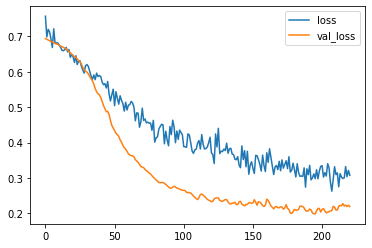

In [61]:
kayipVerisi.plot(#)

In [65]:
#tahminlerimiz=model.predict_classes(x_test) yerine bunu denedik
tahminlerimiz = model.predict(x_test) #verdiğimiz yeni girdilere göre bize yeni tahminler üretecektir.
tahminlerimiz=np.round(tahminlerimiz).astype(int)

In [66]:
tahminlerimiz

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [69]:
from sklearn.metrics import classification_report,confusion_matrix #sınıflandırmanın ne kadar doğru olduğunu gösteren matrix'tir.

In [71]:
print(classification_report(y_test,tahminlerimiz))

#precision doğruluk..

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        92
           1       0.84      0.96      0.90        67

    accuracy                           0.91       159
   macro avg       0.90      0.91      0.90       159
weighted avg       0.91      0.91      0.91       159



In [72]:
print(confusion_matrix(y_test,tahminlerimiz))

""" output

[[80 12]
 [ 3 64]]
 

üstteki [80,12] sayının anlamı 12 tane yanlışı var demek.
"""

[[80 12]
 [ 3 64]]


In [74]:
isim="BTK"
isim[::-1]

'KTB'

In [75]:
meyveler=["elma","armut","portakal","erik"]
meyveler[-1]

'erik'

['A' 'B' 'C' 'D']


In [78]:
numpy_array1=np.array([[0,1,2,3,4,5,6]])
print(numpy_array1.ndim)


2
